In [3]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [4]:
WAVEFORM_path_export = 'waveform'
SPECTROGRAM_path_export='spectogram'
CHROMAGRAM_path_export='chromagram'
MFCC_path_export='mfcc'
clip = (r'C:\Users\BHC4SLP\Documents\Python Projects\Proyecto2-GraficaAudio\PruebaAudio1.wav')

### BASIC INFORMATION OF THE FILE AUDIO

In [5]:
y, sr = librosa.load(clip) 
y.shape

(110080,)

In [6]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [7]:
# total number of samples in audio file
tot_samples = len(y)
tot_samples

110080

In [8]:
# duration of y audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 4.992290249433107 seconds


## Transformada de fourier y amplitud en decibeles

In [9]:
D = librosa.stft(y) # STFT of y 
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 

[Text(0.5, 1.0, 'WAVEFORM')]

<Figure size 1500x1700 with 0 Axes>

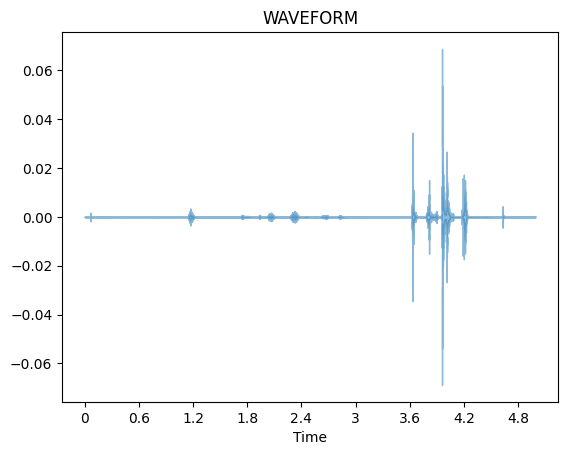

In [10]:
# Simple WAVEFORM to check clip trimming accuracy 
plt.figure(figsize=(15, 17))
fig, ax = plt.subplots() 
img = librosa.display.waveshow(y, sr=sr, axis='time',alpha=0.5) 
ax.set(title='WAVEFORM') 


In [11]:
#The first strips off any trailing slashes, the second gives you the last part of the path.
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".wav", "-", 1) + "WAVEFORM.png" 
if not os.path.exists(WAVEFORM_path_export): 
    os.makedirs(WAVEFORM_path_export) 
fig.savefig(os.path.join(WAVEFORM_path_export,image_filename_to_save)) 
plt.close('all')

## Calculating amplitude envelope

In [12]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)   

In [13]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [14]:
# number of frames in amplitude envelope
ae_y = amplitude_envelope(y, FRAME_SIZE, HOP_LENGTH)
len(ae_y)

215

### Visualizing amplitude envelope

In [15]:
frames = range(len(ae_y))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

Text(0.5, 1.0, 'Amplitude envelope')

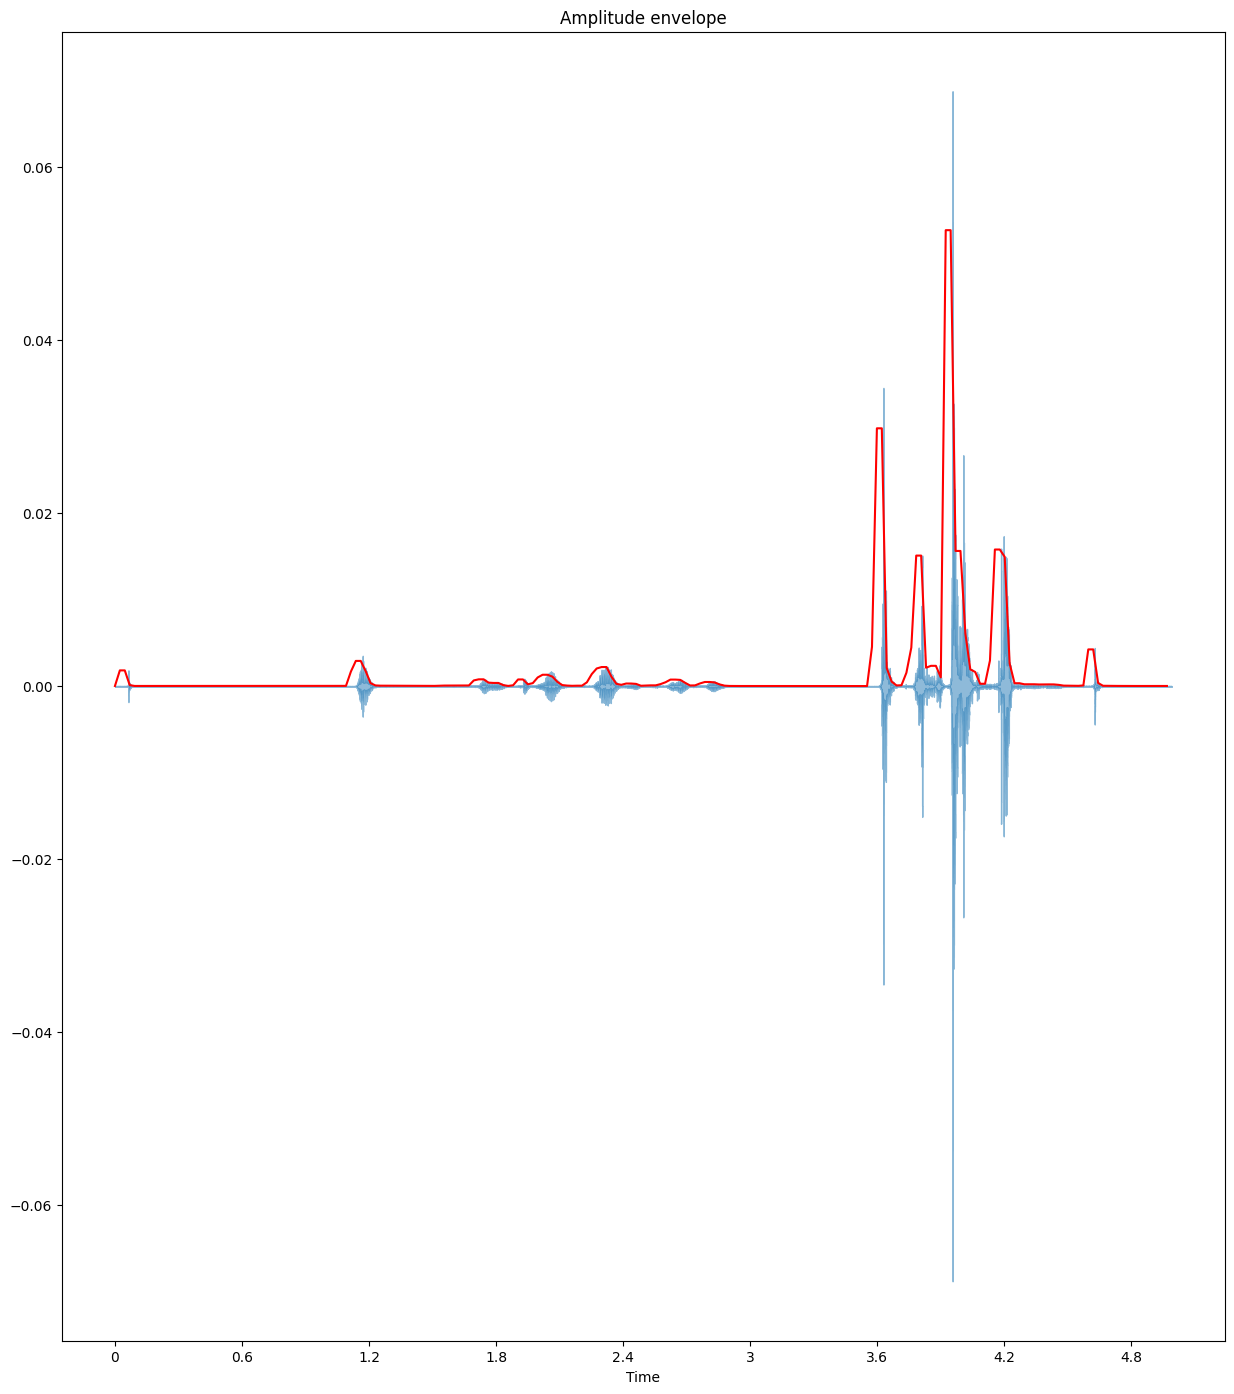

In [16]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot()
librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, ae_y, color="r")
#plt.ylim((-1, 1))
plt.title("Amplitude envelope")

## Root-mean-squared energy with Librosa


In [17]:
rms_y = librosa.feature.rms(y=y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


## Visualise RMSE + waveform

In [18]:
frames = range(len(rms_y))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

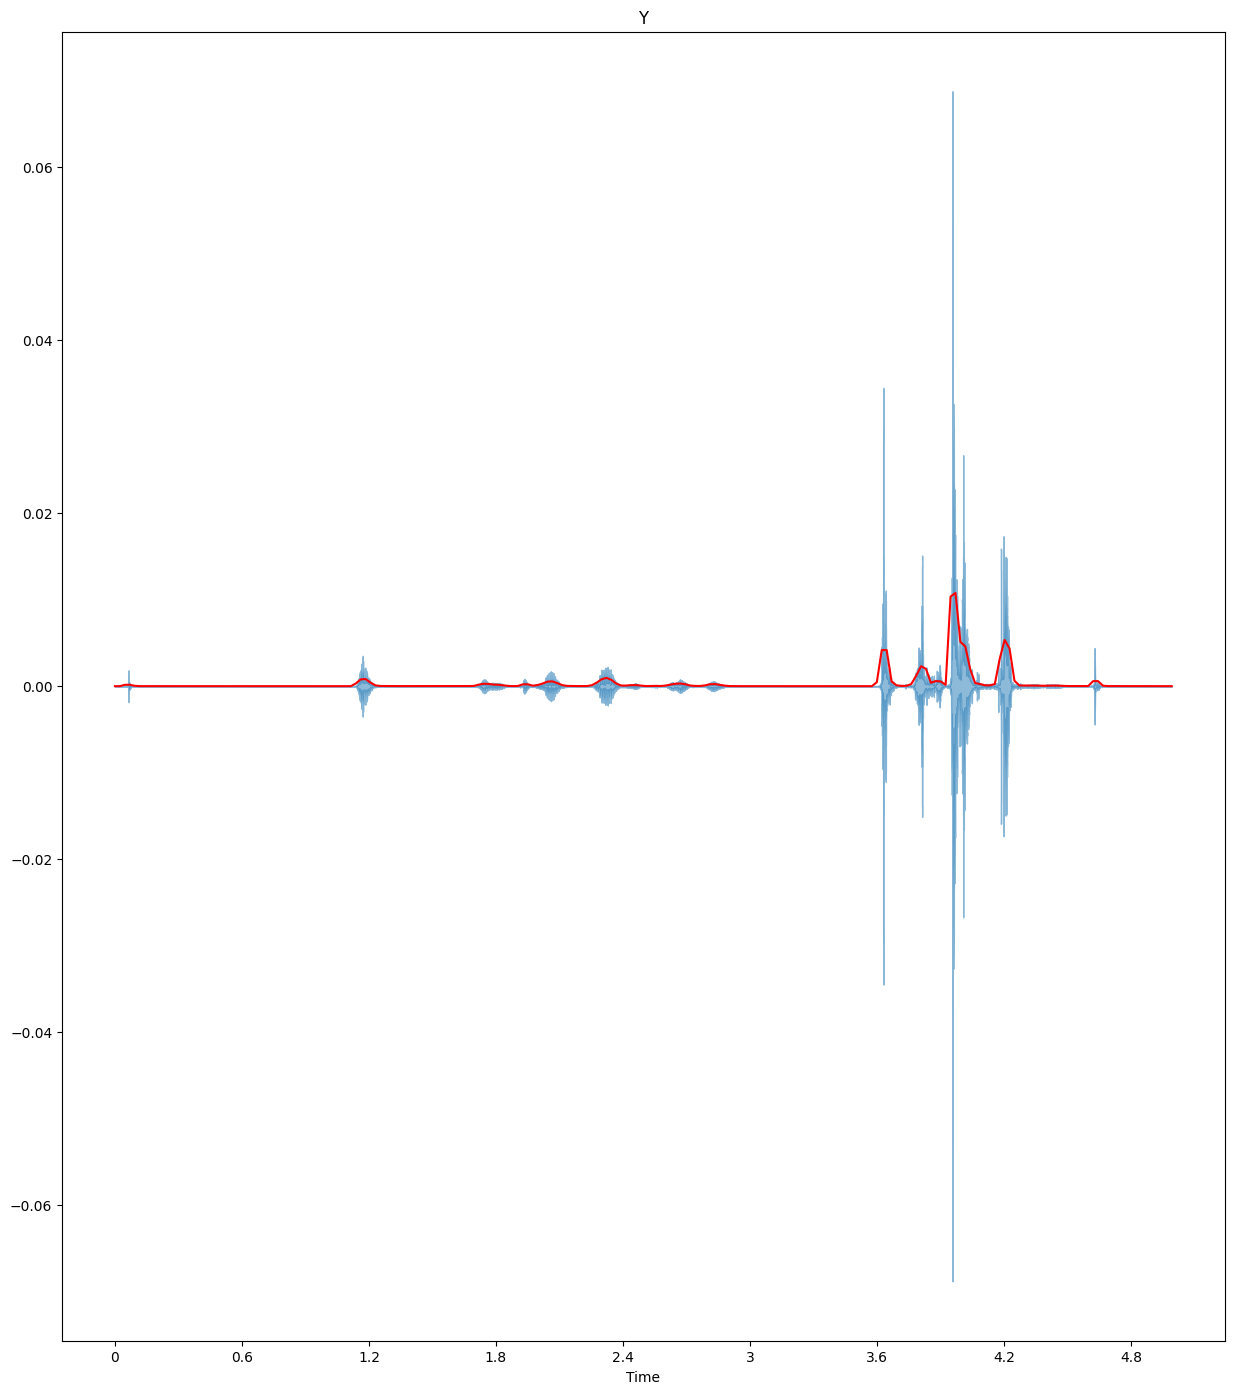

In [19]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))
ax = plt.subplot()
librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, rms_y, color="r")
#plt.ylim((-1, 1))
plt.title("Y")
plt.show()

## Zero-crossing rate with Librosa


In [20]:
zcr_y = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [21]:
zcr_y.size

216

## Visualise zero-crossing rate with Librosa

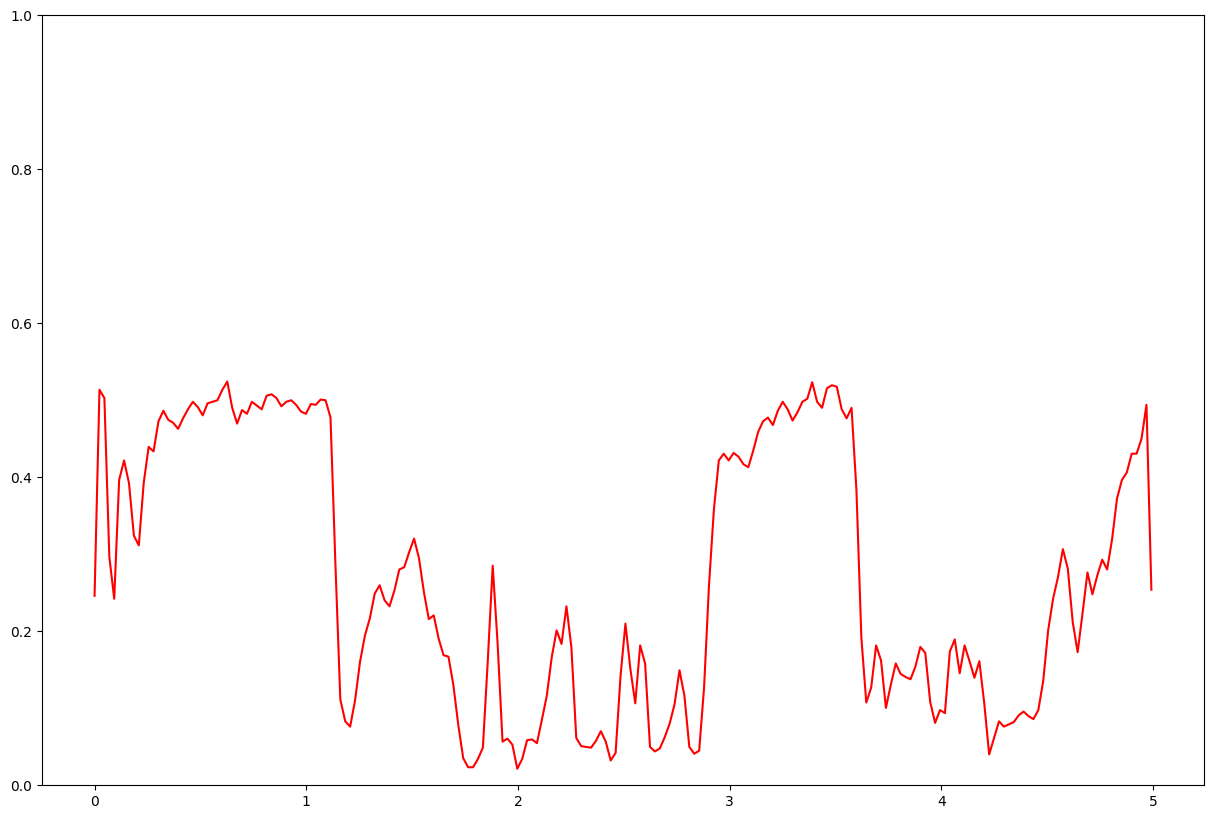

In [22]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_y, color="r")
plt.ylim(0, 1)
plt.show()

## SPECTROGRAM

[Text(0.5, 1.0, 'SPECTROGRAM')]

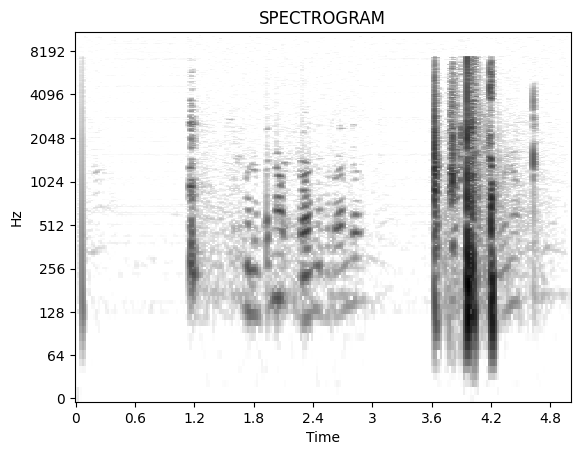

In [23]:
# SPECTROGRAM representation - object-oriented interface 
fig, ax = plt.subplots() 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax) 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax, cmap='gray_r') 
ax.set(title='SPECTROGRAM') 

In [2]:
#The first strips off any trailing slashes, the second gives you the last part of the path. 
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "SPECTROGRAM.png" 
if not os.path.exists(SPECTROGRAM_path_export): 
    os.makedirs(SPECTROGRAM_path_export) 
fig.savefig(os.path.join(SPECTROGRAM_path_export,image_filename_to_save)) 
plt.close()

NameError: name 'os' is not defined

## CHROMAGRAM

In [ ]:
#CHROMAGRAM representation - object-oriented interface 
CHROMAGRAM = librosa.feature.chroma_cqt(y=y, sr=sr) 
fig, ax = plt.subplots() 
img = librosa.display.specshow(CHROMAGRAM, y_axis='chroma', x_axis='time', ax=ax) 
ax.set(title='CHROMAGRAM') 


In [ ]:
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "CHROMAGRAM.png" 
if not os.path.exists(CHROMAGRAM_path_export): 
    os.makedirs(CHROMAGRAM_path_export) 
fig.savefig(os.path.join(CHROMAGRAM_path_export,image_filename_to_save)) 
plt.close()

## MFCCs

In [ ]:
#MFCC representation - object-oriented interface 
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=1200) 
fig, ax = plt.subplots() 
img = librosa.display.specshow(mfccs, x_axis='time') 
ax.set(title='Mel-frequency cepstral coefficients (MFCCs)') 

In [ ]:
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "MFCC.png" 
if not os.path.exists(MFCC_path_export): 
    os.makedirs(MFCC_path_export) 
fig.savefig(os.path.join(MFCC_path_export,image_filename_to_save)) 
plt.close()